In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import string
from nltk.corpus import stopwords

In [2]:
# Load IMDB movie reviews dataset
df = pd.read_csv(r"C:\Users\Ibrahim Yousaf\OneDrive\Desktop\Sentiment_Analysis_Movie_Reviews\IMDB Dataset.csv")
# Display the first few rows of the dataset
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# Exploring the dataset

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [5]:
df.shape

(50000, 2)

In [6]:
df.describe

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.columns

Index(['review', 'sentiment'], dtype='object')

# Data Visualization

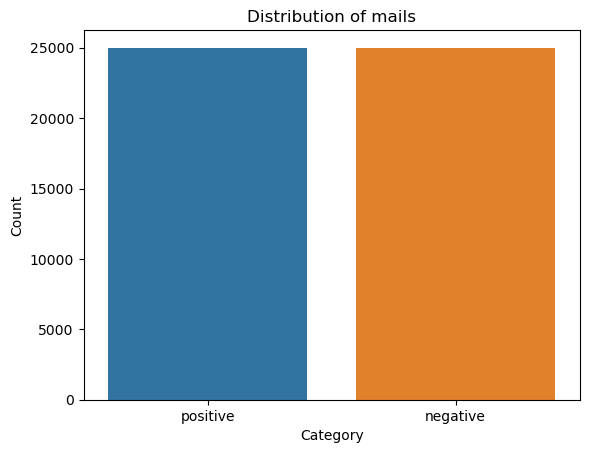

In [9]:
sns.countplot(data=df, x='sentiment')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of mails')
plt.show()

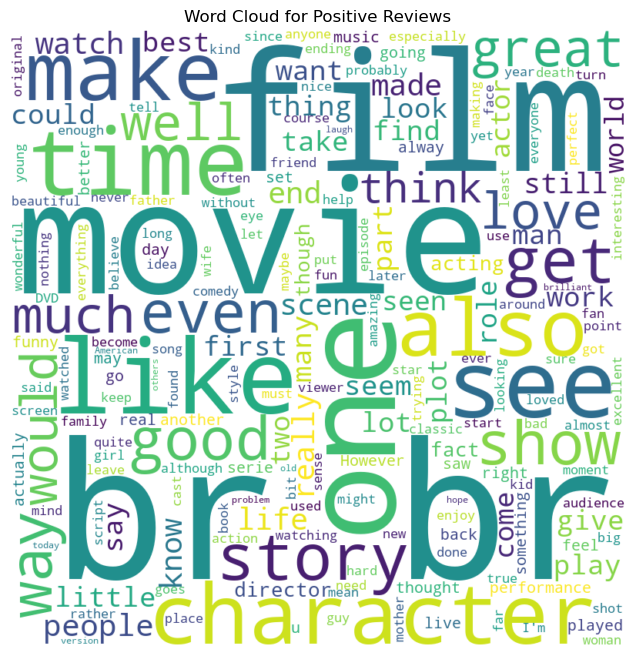

In [10]:
# Filter the DataFrame to select only positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['review']

# Concatenate all positive reviews into a single string
all_positive_reviews = ' '.join(positive_reviews)

# Generate the word cloud using all words in positive reviews
wordcloud_positive = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords.words('english')).generate(all_positive_reviews)

# Plot the WordCloud image for positive reviews
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis("off")
plt.show()


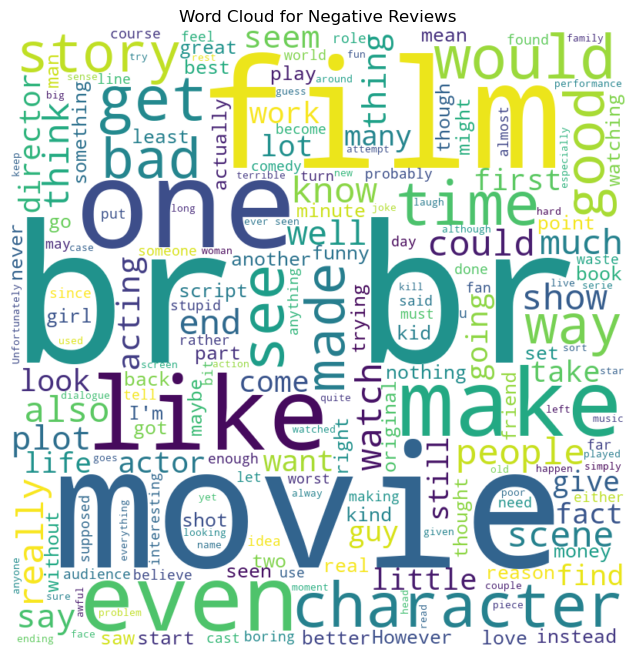

In [11]:
# Filter the DataFrame to select only negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['review']

# Concatenate all negative reviews into a single string
all_negative_reviews = ' '.join(negative_reviews)

# Generate the word cloud using all words in negative reviews
wordcloud_negative = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords.words('english')).generate(all_negative_reviews)

# Plot the WordCloud image for negative reviews
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis("off")
plt.show()


# Preprocessing data

In [12]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()    
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)   
    # Remove hashtags
    text = re.sub(r'#\w+', '', text) 
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [13]:
# Apply text preprocessing
df['review'] = df['review'].apply(preprocess_text)

In [14]:
df.head(10)

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive
5,probably time favorite movie story selflessnes...,positive
6,sure would like see resurrection dated seahunt...,positive
7,show amazing fresh innovative idea first aired...,negative
8,encouraged positive comments film looking forw...,negative
9,like original gut wrenching laughter like movi...,positive


# Encoding the labels

In [15]:
# Label encode the sentiments
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Split the data into features and labels
X = df['review']
y = df['sentiment']

In [16]:
X

0        one reviewers mentioned watching oz episode ho...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

In [17]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32

# Splitting the data for train and test

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Extraction (TF-IDF)

In [19]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Multinomial Naive-Baiyes

In [20]:
# Use Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 86.78%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4961
           1       0.88      0.85      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%')
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 89.83%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Support Vector Machine

In [22]:
from sklearn.svm import LinearSVC

# Use SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))


C:\Users\Ibrahim Yousaf\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 89.70%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Function to check the sentiment of a movie review 

In [23]:
def predict_review(review):
    review_preprocessed = preprocess_text(review)
    review_features = vectorizer.transform([review_preprocessed])
    prediction = model.predict(review_features)
    return 'Positive' if prediction[0] == 1 else 'Negative'

# Example of a positive movie review

In [24]:
# Example reviews
example_review_1 = "I loved the movie! It was fantastic and thrilling."
# Output predictions
print(f"Example Review 1: {predict_review(example_review_1)}")

Example Review 1: Positive


# Example of a negative movie review

In [25]:
example_review_2 = "The movie was terrible and boring. Not worth watching."
print(f"Example Review 2: {predict_review(example_review_2)}")

Example Review 2: Negative
